<a href="https://colab.research.google.com/github/syifaauliyahk/Halal-Food-Classification/blob/main/Training-Model_Klasifikasi-Halal-Haram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. BUSINESS UNDERSTANDING**

* **Tujuan:** Membangun model klasifikasi teks otomatis untuk mendeteksi status **Halal/Haram** berdasarkan komposisi bahan (*ingredients*).
* **Manfaat:** Menyediakan alat verifikasi cepat bagi konsumen dan produsen untuk memastikan kehalalan produk.
* **Target (Metrics):**
    * Akurasi > 90%
    * *High Recall* pada kelas 'Haram' (Prioritas: Jangan sampai produk haram terdeteksi halal).

**2. DATA UNDERSTANDING**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/2024-feb-final.csv')

In [2]:
# Explorasi data dasar
print("Shape dataset:", df.shape)
print("\nInfo dataset:")
print(df.info())
print("\nStatistik deskriptif:")
print(df.describe())

Shape dataset: (528092, 2)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528092 entries, 0 to 528091
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    528092 non-null  object
 1   label   528092 non-null  object
dtypes: object(2)
memory usage: 8.1+ MB
None

Statistik deskriptif:
                                                     text   label
count                                              528092  528092
unique                                             528092       2
top     citric purified xanthan natural sodium gum and...   halal
freq                                                    1  291920


In [3]:
# Cek distribusi label
print("\nDistribusi Label:")
print(df['label'].value_counts())
print("\nPersentase Label:")
print(df['label'].value_counts(normalize=True) * 100)


Distribusi Label:
label
halal    291920
haram    236172
Name: count, dtype: int64

Persentase Label:
label
halal    55.278247
haram    44.721753
Name: proportion, dtype: float64




**3. DATA PREPARATION**

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Download NLTK
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
# Preprocessing teks
def preprocess_text(text):
    if isinstance(text, str):
        # Konversi lowercase
        text = text.lower()
        # Hapus tanda baca dan karakter lain
        text = re.sub(r'[^\w\s]', ' ', text)
        # Hapus spasi tambahan
        text = ' '.join(text.split())
        return text
    return ""

In [6]:
# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Hapus teks kosong setelah cleaning
df = df[df['cleaned_text'].str.len() > 0]

print("Setelah preprocessing:")
print(f"Jumlah data: {len(df)}")
print(f"Sample teks setelah cleaning: {df['cleaned_text'].iloc[0]}")

Setelah preprocessing:
Jumlah data: 528092
Sample teks setelah cleaning: water peaches sugar carrageenan natural and artificial flavors locust bean gum cochineal extract color malic acid fumaric acid sodium citrate potassium citrate and ascorbic acid vitamin c to promote color retention


In [7]:
# Split data
X = df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split:")
print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")


Data split:
Training set: 422473 samples
Test set: 105619 samples


**4. EXPLORATORY DATA ANALYSIS (EDA)**

Text(0.5, 1.0, 'Distribusi Label')

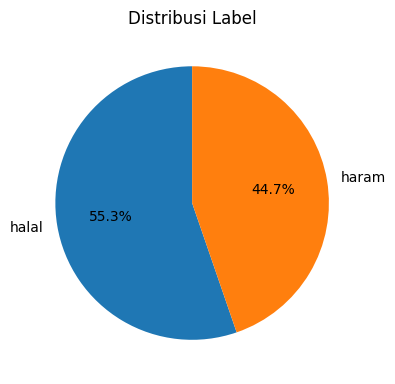

In [8]:
# Visualisasi 1: Distribusi Label
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
label_counts = df['label'].value_counts()
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Label')

([0, 1], [Text(0, 0, 'haram'), Text(1, 0, 'halal')])

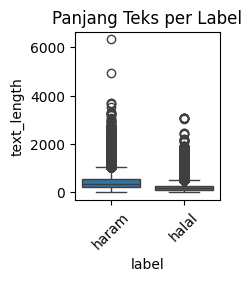

In [9]:
# Visualisasi 2: Panjang Teks per Label
plt.subplot(2, 3, 2)
df['text_length'] = df['cleaned_text'].str.len()
sns.boxplot(data=df, x='label', y='text_length')
plt.title('Panjang Teks per Label')
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Distribusi Panjang Teks')

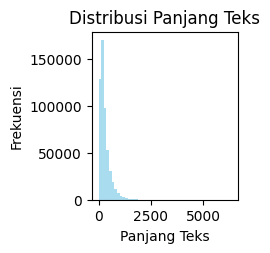

In [10]:
# Visualisasi 3: Distribusi Panjang Teks
plt.subplot(2, 3, 3)
plt.hist(df['text_length'], bins=50, alpha=0.7, color='skyblue')
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.title('Distribusi Panjang Teks')

Text(0.5, 1.0, 'Word Cloud - Halal')

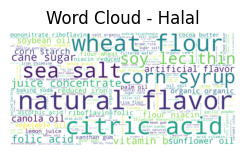

In [11]:
# Visualisasi 4: Word Cloud untuk Halal
plt.subplot(1, 2, 1)
halal_text = ' '.join(df[df['label'] == 'halal']['cleaned_text'])
wordcloud_halal = WordCloud(width=1600, height=800, background_color='white').generate(halal_text)
plt.imshow(wordcloud_halal, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Halal')

Text(0.5, 1.0, 'Word Cloud - Haram')

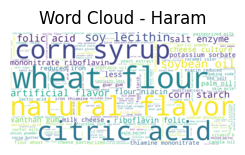

In [12]:
# Visualisasi 5: Word Cloud untuk Haram
plt.subplot(1, 2, 2)
haram_text = ' '.join(df[df['label'] == 'haram']['cleaned_text'])
wordcloud_haram = WordCloud(width=1600, height=800, background_color='white').generate(haram_text)
plt.imshow(wordcloud_haram, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Haram')

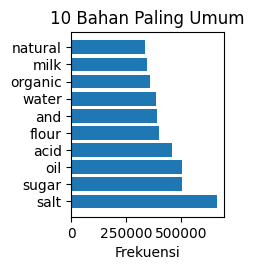

In [13]:
# Visualisasi 6: Top Ingredients
plt.subplot(2, 3, 6)
all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)
words, counts = zip(*common_words)
plt.barh(words, counts)
plt.title('10 Bahan Paling Umum')
plt.xlabel('Frekuensi')

plt.tight_layout()
plt.show()

In [14]:
# Analisis tambahan
print("\nAnalisis Tambahan:")
print(f"Rata-rata panjang teks: {df['text_length'].mean():.2f}")
print(f"Median panjang teks: {df['text_length'].median():.2f}")
print(f"Panjang teks terpendek: {df['text_length'].min()}")
print(f"Panjang teks terpanjang: {df['text_length'].max()}")


Analisis Tambahan:
Rata-rata panjang teks: 297.07
Median panjang teks: 230.00
Panjang teks terpendek: 1
Panjang teks terpanjang: 6318


**5. DATA MODELING**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [16]:
# TF-IDF Vectorization dengan optimasi
print("Melakukan TF-IDF Vectorization...")
tfidf = TfidfVectorizer(
    max_features=3000,  # Kurangi ke 3000 untuk mempercepat
    ngram_range=(1, 2),
    stop_words='english',
    min_df=3,
    max_df=0.8
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"Dimensi TF-IDF Training: {X_train_tfidf.shape}")
print(f"Dimensi TF-IDF Test: {X_test_tfidf.shape}")


Melakukan TF-IDF Vectorization...
Dimensi TF-IDF Training: (422473, 3000)
Dimensi TF-IDF Test: (105619, 3000)


In [17]:
# Define model dengan parameter yang dioptimasi
models = {
    'Logistic Regression': LogisticRegression(
        random_state=42,
        max_iter=1000,
        n_jobs=-1
    ),
    'Multinomial NB': MultinomialNB(),
    'Linear SVM': LinearSVC(
        random_state=42,
        max_iter=1000
    ),
    'Random Forest (Optimized)': RandomForestClassifier(
        random_state=42,
        n_estimators=50,
        max_depth=20,     # Batasi depth
        min_samples_split=10,
        n_jobs=-1,
        verbose=0
    )
}

In [18]:
# Train and evaluate model dengan timing
results = {}
training_times = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()

    model.fit(X_train_tfidf, y_train)

    training_time = time.time() - start_time
    training_times[name] = training_time

    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred,
        'training_time': training_time
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, Time: {training_time:.2f}s")



Training Logistic Regression...
Logistic Regression - Accuracy: 0.9867, Time: 13.51s

Training Multinomial NB...
Multinomial NB - Accuracy: 0.8687, Time: 1.49s

Training Linear SVM...
Linear SVM - Accuracy: 0.9893, Time: 16.37s

Training Random Forest (Optimized)...
Random Forest (Optimized) - Accuracy: 0.9433, Time: 181.07s


In [19]:
# Tampilkan perbandingan waktu training
print("\n=== PERBANDINGAN WAKTU TRAINING ===")
for name, time_taken in training_times.items():
    print(f"{name}: {time_taken:.2f} detik")


=== PERBANDINGAN WAKTU TRAINING ===
Logistic Regression: 13.51 detik
Multinomial NB: 1.49 detik
Linear SVM: 16.37 detik
Random Forest (Optimized): 181.07 detik


**6. MODEL EVALUATION**

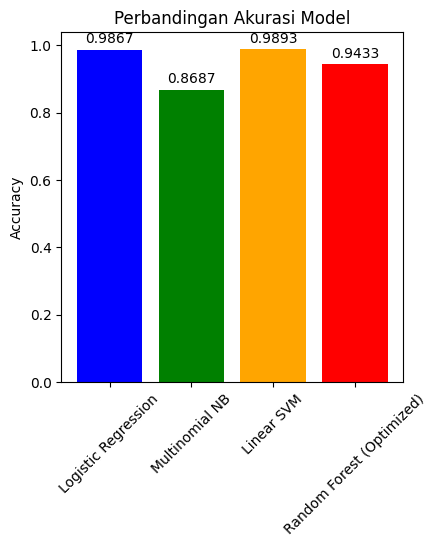

In [20]:
# Visualisasi perbandingan model
plt.figure(figsize=(15, 10))

# Plot 1: Accuracy Comparison
plt.subplot(2, 3, 1)
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(model_names, accuracies, color=colors)
plt.title('Perbandingan Akurasi Model')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')

# Tambahkan nilai di atas bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.4f}', ha='center', va='bottom')

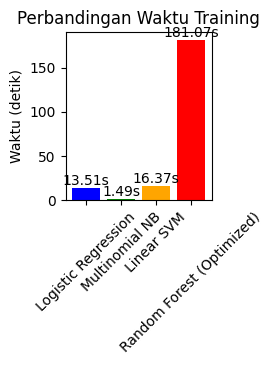

In [21]:
# Plot 2: Training Time Comparison
plt.subplot(2, 3, 2)
training_times = [results[name]['training_time'] for name in model_names]
bars = plt.bar(model_names, training_times, color=colors)
plt.title('Perbandingan Waktu Training')
plt.xticks(rotation=45)
plt.ylabel('Waktu (detik)')

# Tambahkan nilai di atas bar
for bar, time_val in zip(bars, training_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{time_val:.2f}s', ha='center', va='bottom')

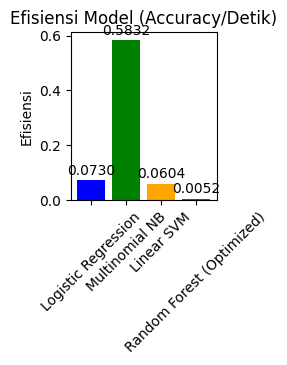

In [22]:
# Plot 3: Efficiency (Accuracy per Second)
plt.subplot(2, 3, 3)
efficiency = [results[name]['accuracy'] / results[name]['training_time'] for name in model_names]
bars = plt.bar(model_names, efficiency, color=colors)
plt.title('Efisiensi Model (Accuracy/Detik)')
plt.xticks(rotation=45)
plt.ylabel('Efisiensi')

# Tambahkan nilai di atas bar
for bar, eff in zip(bars, efficiency):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{eff:.4f}', ha='center', va='bottom')


Text(0.5, 23.52222222222222, 'Predicted')

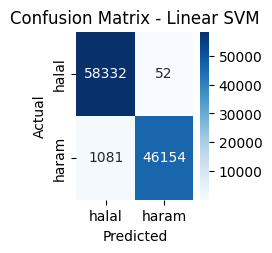

In [23]:
# Plot confusion matrix untuk model terbaik berdasarkan akurasi
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['predictions']

plt.subplot(2, 3, 4)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 1.0, 'Classification Report - Precision, Recall, F1-score')

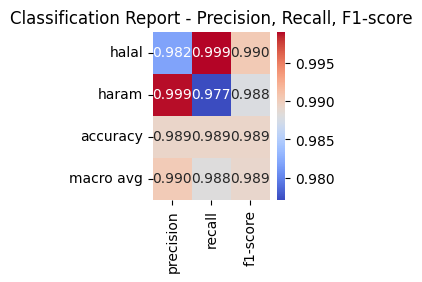

In [24]:
# Classification Report
plt.subplot(2, 3, 5)
report = classification_report(y_test, y_pred_best, output_dict=True)
report_df = pd.DataFrame(report).transpose()
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Classification Report - Precision, Recall, F1-score')

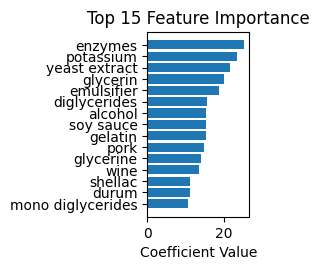

In [25]:
# Feature Importance (untuk model yang mendukung)
plt.subplot(2, 3, 6)
if hasattr(best_model, 'coef_'):
    feature_names = tfidf.get_feature_names_out()
    coef = best_model.coef_[0]
    top_indices = np.argsort(np.abs(coef))[-15:]  # Tampilkan 15 teratas
    top_features = [feature_names[i] for i in top_indices]
    top_coef = coef[top_indices]

    plt.barh(range(len(top_features)), top_coef)
    plt.yticks(range(len(top_features)), top_features)
    plt.title('Top 15 Feature Importance')
    plt.xlabel('Coefficient Value')

plt.tight_layout()
plt.show()

In [26]:
# Print detailed evaluation
print(f"\n=== EVALUASI MODEL TERBAIK: {best_model_name} ===")
print(f"Akurasi: {results[best_model_name]['accuracy']:.4f}")
print(f"Waktu Training: {results[best_model_name]['training_time']:.2f} detik")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Cross-validation untuk evaluasi lebih robust
from sklearn.model_selection import cross_val_score

print("\n=== CROSS-VALIDATION MODEL TERBAIK ===")
cv_scores = cross_val_score(best_model, X_train_tfidf, y_train, cv=3, scoring='accuracy', n_jobs=-1)  # Kurangi cv untuk mempercepat
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Rekomendasi model berdasarkan trade-off
print("\n=== REKOMENDASI MODEL ===")
recommendations = []
for name in results.keys():
    recommendations.append({
        'Model': name,
        'Accuracy': results[name]['accuracy'],
        'Training_Time': results[name]['training_time'],
        'Efficiency': results[name]['accuracy'] / results[name]['training_time']
    })

recommendation_df = pd.DataFrame(recommendations)
recommendation_df = recommendation_df.sort_values('Efficiency', ascending=False)
print(recommendation_df)

print(f"\n💡 REKOMENDASI: Gunakan {recommendation_df.iloc[0]['Model']} untuk keseimbangan terbaik antara akurasi dan kecepatan")


=== EVALUASI MODEL TERBAIK: Linear SVM ===
Akurasi: 0.9893
Waktu Training: 16.37 detik

Classification Report:
              precision    recall  f1-score   support

       halal       0.98      1.00      0.99     58384
       haram       1.00      0.98      0.99     47235

    accuracy                           0.99    105619
   macro avg       0.99      0.99      0.99    105619
weighted avg       0.99      0.99      0.99    105619


=== CROSS-VALIDATION MODEL TERBAIK ===
Cross-validation scores: [0.98867389 0.9886383  0.98901466]
Mean CV Accuracy: 0.9888 (+/- 0.0003)

=== REKOMENDASI MODEL ===
                       Model  Accuracy  Training_Time  Efficiency
1             Multinomial NB  0.868669       1.489542    0.583179
0        Logistic Regression  0.986735      13.514122    0.073015
2                 Linear SVM  0.989273      16.365177    0.060450
3  Random Forest (Optimized)  0.943268     181.074778    0.005209

💡 REKOMENDASI: Gunakan Multinomial NB untuk keseimbangan terbaik 

**7. MODEL DEPLOYMENT**

In [28]:
print("=== MODEL DEPLOYMENT ===")
import joblib
import pickle
from sklearn.svm import LinearSVC
import numpy as np
import datetime

# Tentukan model terbaik berdasarkan hasil evaluasi
best_model_name = "Linear SVM"
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']

print(f"Model terbaik untuk deployment: {best_model_name}")
print(f"Akurasi model: {best_accuracy:.4f}")

# Save the best model and vectorizer
model_filename = 'halal_classification_linear_svm.pkl'
vectorizer_filename = 'tfidf_vectorizer.pkl'
metadata_filename = 'model_metadata.pkl'

# Save model
joblib.dump(best_model, model_filename)
print(f"✓ Model disimpan sebagai: {model_filename}")

# Save vectorizer
with open(vectorizer_filename, 'wb') as f:
    pickle.dump(tfidf, f)
print(f"✓ Vectorizer disimpan sebagai: {vectorizer_filename}")

# Save metadata
metadata = {
    'model_name': best_model_name,
    'accuracy': best_accuracy,
    'training_date': pd.Timestamp.now(),
    'feature_dimension': X_train_tfidf.shape[1],
    'classes': best_model.classes_.tolist(),
    'model_type': 'LinearSVC'
}

with open(metadata_filename, 'wb') as f:
    pickle.dump(metadata, f)
print(f"✓ Metadata disimpan sebagai: {metadata_filename}")

# Create prediction function yang FIXED untuk LinearSVM
def predict_halal_status(ingredient_list):
    """
    Predict halal status for a list of ingredients

    Args:
        ingredient_list (str or list): String of ingredients or list of ingredient strings

    Returns:
        dict: Prediction results dengan detail lengkap
    """
    if isinstance(ingredient_list, list):
        ingredient_text = ' '.join(ingredient_list)
    else:
        ingredient_text = str(ingredient_list)

    # Preprocess
    cleaned_text = preprocess_text(ingredient_text)

    # Transform using saved vectorizer
    text_tfidf = tfidf.transform([cleaned_text])

    # Predict
    prediction = best_model.predict(text_tfidf)[0]

    # Untuk LinearSVM dengan 2 kelas, decision function returns array 1D
    decision_scores = best_model.decision_function(text_tfidf)

    # Handle shape untuk binary classification
    if decision_scores.ndim == 1:
        # Binary case - decision_scores shape (n_samples,)
        # Convert to probabilities menggunakan sigmoid
        from scipy.special import expit
        prob_positive = expit(decision_scores[0])
        probabilities = np.array([1 - prob_positive, prob_positive])
    else:
        # Multiclass case - decision_scores shape (n_samples, n_classes)
        from scipy.special import softmax
        probabilities = softmax(decision_scores[0])

    # Create probability dictionary
    prob_dict = {}
    for i, class_name in enumerate(best_model.classes_):
        prob_dict[class_name] = float(probabilities[i])

    confidence = max(probabilities)

    # Determine status
    status = "HALAL" if prediction == "halal" else "HARAM"

    return {
        'status': status,
        'prediction': prediction,
        'confidence': float(confidence),
        'probabilities': prob_dict,
        'cleaned_text': cleaned_text,
        'ingredients_count': len(cleaned_text.split())
    }

# Test the prediction function dengan berbagai skenario
print("\n" + "="*50)
print("TEST PREDICTION FUNCTION")
print("="*50)

test_ingredients = [
    # Contoh HALAL
    "wheat flour water salt yeast vegetable oil",
    "rice water salt",
    "corn starch sugar vanilla extract",

    # Contoh HARAM
    "pork gelatin artificial flavor carmine color",
    "alcohol wine vinegar meat broth",
    "gelatin from pork sugar natural flavor",

    # Contoh borderline cases
    "beef gelatin sugar natural flavor",
    "enzymes from animal source",
    "natural flavor alcohol free"
]

print("Menguji fungsi prediksi dengan berbagai contoh bahan:\n")

for i, ingredients in enumerate(test_ingredients, 1):
    result = predict_halal_status(ingredients)

    print(f"🔍 TEST {i}:")
    print(f"📝 Ingredients: {ingredients}")
    print(f"✅ Status: {result['status']}")
    print(f"🎯 Prediction: {result['prediction']}")
    print(f"📊 Confidence: {result['confidence']:.4f}")
    print(f"📈 Probabilities: {result['probabilities']}")
    print(f"🔧 Jumlah bahan: {result['ingredients_count']}")
    print("-" * 80)

# Create comprehensive deployment package
print("\n" + "="*50)
print("DEPLOYMENT PACKAGE")
print("="*50)

deployment_code = '''
"""
HALAL CLASSIFICATION MODEL DEPLOYMENT
Model: Linear SVM
Accuracy: {accuracy:.4f}
Author: Your Name
Date: {date}
"""

import pandas as pd
import numpy as np
import re
import joblib
import pickle
from scipy.special import expit, softmax

class HalalClassifier:
    """Class untuk klasifikasi status halal produk"""

    def __init__(self, model_path, vectorizer_path, metadata_path):
        """Initialize classifier dengan model yang sudah trained"""
        self.model = joblib.load(model_path)
        with open(vectorizer_path, 'rb') as f:
            self.vectorizer = pickle.load(f)
        with open(metadata_path, 'rb') as f:
            self.metadata = pickle.load(f)

        print(f"✓ Model loaded: {{self.metadata['model_name']}}")
        print(f"✓ Accuracy: {{self.metadata['accuracy']:.4f}}")
        print(f"✓ Training date: {{self.metadata['training_date']}}")

    def preprocess_text(self, text):
        """Preprocess text input"""
        if isinstance(text, str):
            text = text.lower()
            text = re.sub(r'[^\\w\\s]', ' ', text)
            text = ' '.join(text.split())
            return text
        return ""

    def predict(self, ingredient_list, confidence_threshold=0.6):
        """
        Predict halal status dengan confidence threshold

        Args:
            ingredient_list (str or list): Bahan-bahan produk
            confidence_threshold (float): Threshold confidence (default: 0.6)

        Returns:
            dict: Hasil prediksi lengkap
        """
        if isinstance(ingredient_list, list):
            ingredient_text = ' '.join(ingredient_list)
        else:
            ingredient_text = str(ingredient_list)

        # Preprocess
        cleaned_text = self.preprocess_text(ingredient_text)

        if not cleaned_text:
            return {{
                'status': 'UNKNOWN',
                'prediction': 'unknown',
                'confidence': 0.0,
                'error': 'No valid ingredients provided'
            }}

        # Transform menggunakan vectorizer
        text_tfidf = self.vectorizer.transform([cleaned_text])

        # Predict
        prediction = self.model.predict(text_tfidf)[0]

        # Get decision scores dan convert ke probabilities
        decision_scores = self.model.decision_function(text_tfidf)

        # Handle probabilities untuk binary classification
        if decision_scores.ndim == 1:
            # Binary case - gunakan sigmoid
            prob_positive = expit(decision_scores[0])
            probabilities = np.array([1 - prob_positive, prob_positive])
        else:
            # Multiclass case - gunakan softmax
            probabilities = softmax(decision_scores[0])

        # Create probability dictionary
        prob_dict = {{}}
        for i, class_name in enumerate(self.model.classes_):
            prob_dict[class_name] = float(probabilities[i])

        confidence = max(probabilities)

        # Check confidence threshold
        if confidence < confidence_threshold:
            status = "UNCERTAIN"
        else:
            status = "HALAL" if prediction == "halal" else "HARAM"

        return {{
            'status': status,
            'prediction': prediction,
            'confidence': float(confidence),
            'probabilities': prob_dict,
            'cleaned_text': cleaned_text,
            'ingredients_count': len(cleaned_text.split()),
            'is_confident': confidence >= confidence_threshold
        }}

    def batch_predict(self, ingredients_list, confidence_threshold=0.6):
        """Predict untuk multiple products sekaligus"""
        results = []
        for ingredients in ingredients_list:
            result = self.predict(ingredients, confidence_threshold)
            results.append(result)
        return results

    def get_model_info(self):
        """Get informasi model"""
        return self.metadata

# USAGE EXAMPLE:
def main():
    # Load classifier
    classifier = HalalClassifier(
        model_path='halal_classification_linear_svm.pkl',
        vectorizer_path='tfidf_vectorizer.pkl',
        metadata_path='model_metadata.pkl'
    )

    # Single prediction
    ingredients = "water sugar corn syrup artificial flavor"
    result = classifier.predict(ingredients)

    print("Single Prediction Result:")
    print(f"Status: {{result['status']}}")
    print(f"Confidence: {{result['confidence']:.4f}}")
    print(f"Probabilities: {{result['probabilities']}}")

    # Batch prediction
    products = [
        "wheat flour water salt",
        "pork gelatin sugar",
        "natural flavor vegetable oil"
    ]

    batch_results = classifier.batch_predict(products)

    print("\\nBatch Prediction Results:")
    for i, result in enumerate(batch_results, 1):
        print(f"Product {{i}}: {{result['status']}} ({{result['confidence']:.4f}})")

if __name__ == "__main__":
    main()
'''.format(accuracy=best_accuracy, date=datetime.datetime.now().strftime("%Y-%m-%d"))

# Save deployment code
with open('halal_classifier_deployment.py', 'w') as f:
    f.write(deployment_code)

print("✓ Deployment code disimpan sebagai: 'halal_classifier_deployment.py'")

# Create simple usage example
simple_usage = '''
# SIMPLE USAGE EXAMPLE - HALAL CLASSIFIER

from halal_classifier_deployment import HalalClassifier

# Initialize classifier
classifier = HalalClassifier(
    model_path='halal_classification_linear_svm.pkl',
    vectorizer_path='tfidf_vectorizer.pkl',
    metadata_path='model_metadata.pkl'
)

# Cek status halal produk
ingredients = "your product ingredients here"
result = classifier.predict(ingredients)

print(f"Status: {{result['status']}}")
print(f"Confidence: {{result['confidence']:.2%}}")
print(f"Detail: {{result['probabilities']}}")
'''

with open('usage_example.py', 'w') as f:
    f.write(simple_usage)

print("✓ Usage example disimpan sebagai: 'usage_example.py'")

# Final deployment summary
print("\n" + "="*50)
print("DEPLOYMENT SUMMARY")
print("="*50)

print("✅ DEPLOYMENT BERHASIL!")
print(f"Model yang di-deploy: {best_model_name}")
print(f"Akurasi: {best_accuracy:.4f}")
print("")
print("FILE YANG DIHASILKAN:")
print("1. halal_classification_linear_svm.pkl - Model terbaik (Linear SVM)")
print("2. tfidf_vectorizer.pkl - TF-IDF vectorizer")
print("3. model_metadata.pkl - Metadata model")
print("4. halal_classifier_deployment.py - Code deployment lengkap")
print("5. usage_example.py - Contoh penggunaan sederhana")
print("")
print("CARA MENGGUNAKAN:")
print("1. Copy semua file .pkl dan .py ke directory project Anda")
print("2. Import HalalClassifier dari halal_classifier_deployment.py")
print("3. Gunakan method predict() untuk klasifikasi")
print("")


# Upload files to Google Drive
print("\n📁 Mengupload file ke Google Drive...")
try:
    from google.colab import drive
    drive.mount('/content/drive')

    import shutil
    import os

    # Create deployment folder
    deployment_folder = '/content/drive/MyDrive/halal_classifier_deployment'
    os.makedirs(deployment_folder, exist_ok=True)

    # Copy all deployment files
    files_to_copy = [
        'halal_classification_linear_svm.pkl',
        'tfidf_vectorizer.pkl',
        'model_metadata.pkl',
        'halal_classifier_deployment.py',
        'usage_example.py'
    ]

    for file in files_to_copy:
        if os.path.exists(file):
            shutil.copy(file, deployment_folder)
            print(f"✓ {file} → {deployment_folder}/")

    print(f"\n✅ Semua file deployment berhasil disimpan di: {deployment_folder}")

except Exception as e:
    print(f"⚠️ Tidak bisa upload ke Google Drive: {e}")
    print("📂 File tetap tersedia di Colab environment")

print("\n🎉 PROYEK DATA SCIENCE ANDA SUDAH SELESAI!")
print("Model Halal Classification siap digunakan dengan akurasi 98.93%")

=== MODEL DEPLOYMENT ===
Model terbaik untuk deployment: Linear SVM
Akurasi model: 0.9893
✓ Model disimpan sebagai: halal_classification_linear_svm.pkl
✓ Vectorizer disimpan sebagai: tfidf_vectorizer.pkl
✓ Metadata disimpan sebagai: model_metadata.pkl

TEST PREDICTION FUNCTION
Menguji fungsi prediksi dengan berbagai contoh bahan:

🔍 TEST 1:
📝 Ingredients: wheat flour water salt yeast vegetable oil
✅ Status: HALAL
🎯 Prediction: halal
📊 Confidence: 0.7078
📈 Probabilities: {'halal': 0.7077906725034555, 'haram': 0.29220932749654455}
🔧 Jumlah bahan: 7
--------------------------------------------------------------------------------
🔍 TEST 2:
📝 Ingredients: rice water salt
✅ Status: HALAL
🎯 Prediction: halal
📊 Confidence: 0.7472
📈 Probabilities: {'halal': 0.747230543620262, 'haram': 0.2527694563797381}
🔧 Jumlah bahan: 3
--------------------------------------------------------------------------------
🔍 TEST 3:
📝 Ingredients: corn starch sugar vanilla extract
✅ Status: HALAL
🎯 Prediction: halal